<a href="https://colab.research.google.com/github/tuliopradoc/analise-dados-enem-2020/blob/main/analise_microdadosEnem_2/analise_microdadosEnem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vizualizando as médias, por município, nas disciplinas do ENEM 2020 utilizando GeoPandas**

In [ ]:
!pip install -U plotly

In [ ]:
!pip install geopandas

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
pd.options.plotting.backend = 'plotly'    # alterando formato de exibição dos gráficos do Pandas

In [ ]:
# Lendo um dataframe contendo as médias agrupadas por município, que foi criado 
# a partir dos microdados disponibilizados em
# https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem 

MediaPorMunicipio = pd.read_csv("/content/drive/MyDrive/Datasets/ENEM -2020/mediapormunicipio.csv")

In [ ]:
MediaPorMunicipio

,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,481.982845,497.095686,511.583922,496.975732,563.764706
1,1100023,Ariquemes,11,RO,477.017094,490.139763,505.977419,492.519017,522.909809
2,1100049,Cacoal,11,RO,491.482353,502.274501,516.913200,514.575650,552.144237
3,1100056,Cerejeiras,11,RO,480.713260,491.171875,502.547917,501.838122,548.958333
4,1100064,Colorado do Oeste,11,RO,493.984000,510.065299,515.020896,519.154000,565.671642
...,...,...,...,...,...,...,...,...,...
1742,5220603,Silvânia,52,GO,491.750093,504.217949,523.172479,518.969202,584.068376
1743,5221403,Trindade,52,GO,479.169841,493.397078,513.111209,498.204610,543.891113
1744,5221601,Uruaçu,52,GO,475.694412,493.677498,512.031683,498.329961,547.938794
1745,5221858,Valparaíso de Goiás,52,GO,472.345358,491.099213,514.270910,487.198018,532.039699


In [ ]:
MediaPorMunicipio.dtypes

CO_MUNICIPIO_PROVA      int64
NO_MUNICIPIO_PROVA     object
CO_UF_PROVA             int64
SG_UF_PROVA            object
NU_NOTA_CN            float64
NU_NOTA_CH            float64
NU_NOTA_LC            float64
NU_NOTA_MT            float64
NU_NOTA_REDACAO       float64
dtype: object

In [ ]:
# Caminho do arquivo ShapeFile do Brasil por municípios

arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Datasets/Copy of BR_Municipios_2019.shp'

In [ ]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [ ]:
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7..."
5568,5222054,Vicentinópolis,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
5569,5222203,Vila Boa,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0..."
5570,5222302,Vila Propício,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2..."


In [ ]:
geo_df.dtypes

CD_MUN        object
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object

### Convertendo o dtype da coluna geo_df['CD_MUN']:


In [ ]:
geo_df['CD_MUN'] = geo_df['CD_MUN'].astype('int64')

In [ ]:
geo_df.dtypes

CD_MUN         int64
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object

In [ ]:
# merge dos dataframes geo_df e MediaPorMunicipio

MediaPorMunicipio_geo_df = geo_df.merge(MediaPorMunicipio, left_on = 'CD_MUN', right_on='CO_MUNICIPIO_PROVA')

### Plotando os dados:

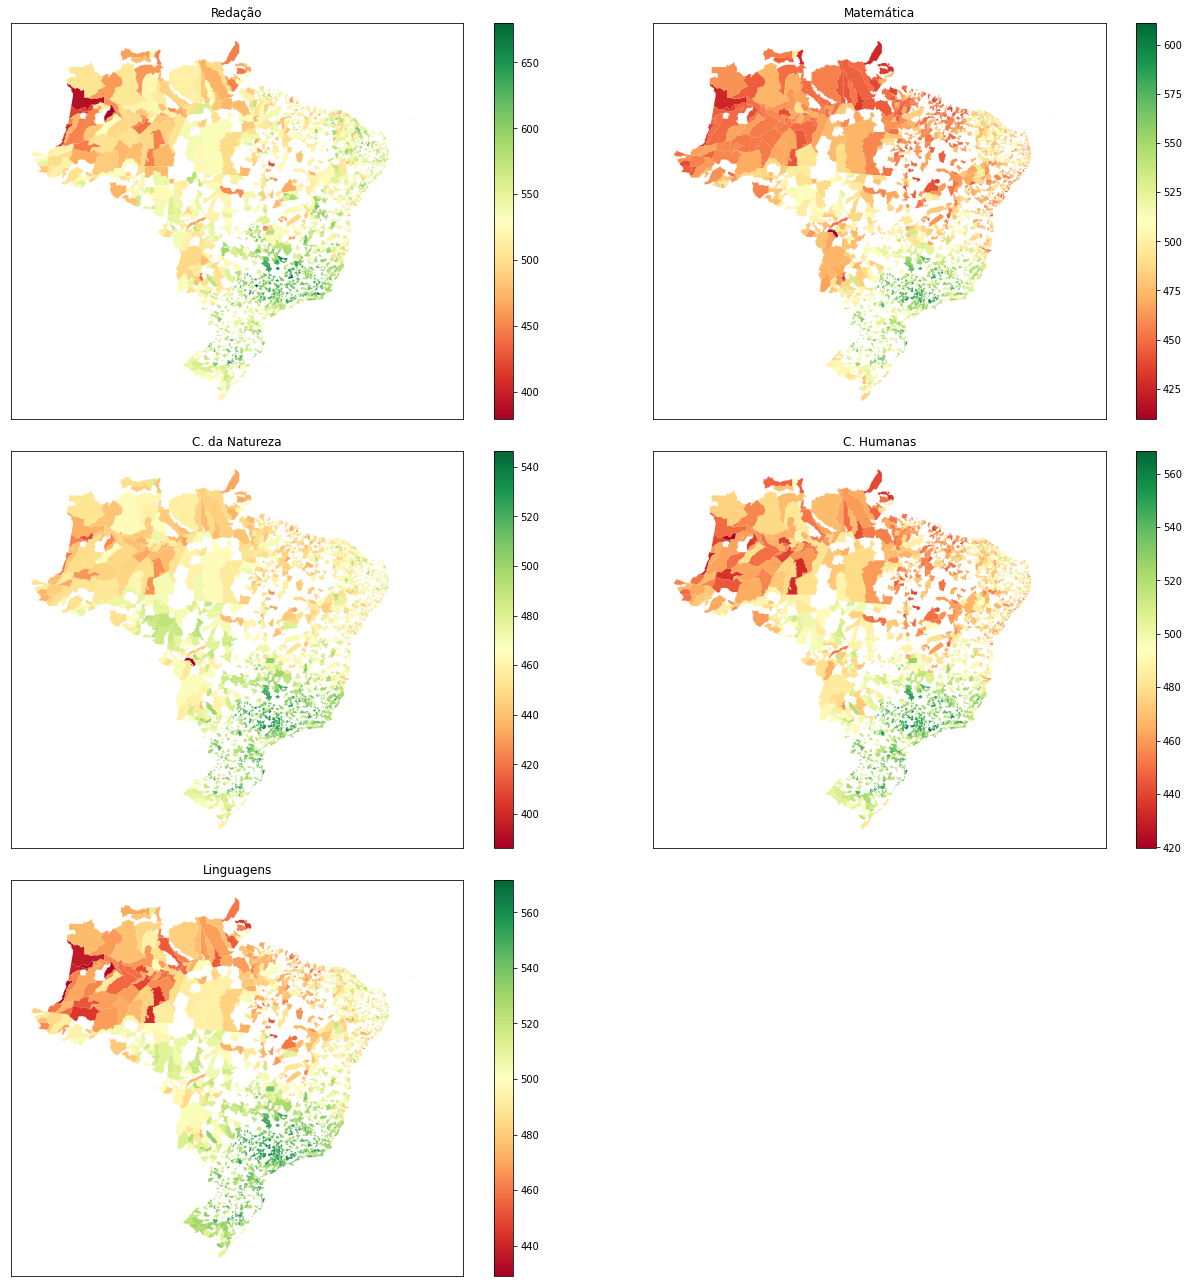

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (18,18))
plt.tight_layout()
fig.delaxes(axs[2,1])
plt.setp(axs, xticks=[], yticks=[])

axs[0,0].set_title('Redação')
axs[0,1].set_title('Matemática')
axs[1,0].set_title('C. da Natureza')
axs[1,1].set_title('C. Humanas')
axs[2,0].set_title('Linguagens')

MediaPorMunicipio_geo_df.plot(column = 'NU_NOTA_REDACAO',legend=True, 
                              cmap='RdYlGn', ax = axs[0,0]);

MediaPorMunicipio_geo_df.plot(column = 'NU_NOTA_MT',legend=True,
                              cmap='RdYlGn', ax = axs[0,1]);

MediaPorMunicipio_geo_df.plot(column = 'NU_NOTA_CN',legend=True, 
                              cmap='RdYlGn', ax = axs[1,0]);

MediaPorMunicipio_geo_df.plot(column = 'NU_NOTA_CH',legend=True, 
                              cmap='RdYlGn', ax = axs[1,1]);

MediaPorMunicipio_geo_df.plot(column = 'NU_NOTA_LC',legend=True, 
                              cmap='RdYlGn', ax = axs[2,0]);